# Week 6 — Categorical Data

In this notebook you'll learn to work with **categorical data**:
- **Contingency tables** (`pd.crosstab`), row/column proportions
- **Grouped summaries** (`.groupby()` + `agg`)
- **Proportions and percentages**
- **Chi-square test** intuition for independence
- **Practical**: correlation-style matrices and heatmaps for **categorical–categorical** relations (Cramér’s V)
- Explore relations in categorical variables

## Setup

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

sns.set_theme(context="notebook")

titanic = sns.load_dataset("titanic").dropna(subset=["sex", "class", "survived"])
tips = sns.load_dataset("tips")

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Contingency Tables

Used to summarize the relationship between two categorical variables. It displays the frequency distribution of the variables in a matrix format, allowing for easy comparison and analysis of their interactions.

Build a contingency table of sex vs survived using pd.crosstab
- Row proportions (normalize='index')
- Column proportions (normalize='columns')

> **Tips & Pitfalls**  
> • Prefer **row-wise proportions** for fair comparisons.  
> • Use **column-wise proportions** to see composition.  
> • Avoid interpreting raw counts alone.

In [ ]:
# Your code here


## 2. Grouped Summaries — `.groupby()`

Groups data by one or more categorical variables
Useful to apply aggregation functions to compute summary statistics for each group.

Using tips, compute grouped summaries:

- mean total_bill and tip by sex and smoker
- tip rate = tip / total_bill -> group its mean

> **Tips & Pitfalls**  
> • Always report **n** with group means.  
> • Use **rates** (e.g., tip_rate) for fairness.  
> • Label aggregations clearly.

In [ ]:
# Your code here


## 3. Proportions and Percentages
Crosstab of class vs survived -> percentages (row-wise). Plot stacked bar chart.

> **Tips & Pitfalls**  
> • Convert counts to **percentages**.  
> • **Stacked bars** show composition; order categories logically.  
> • Consider adding exact labels.

In [ ]:
# Your code here


## 4. Chi-square Intuition
Chi'square is for independence between two categorical variables

Test for independence on sex vs survived

In [ ]:
# Your code here



## 5. Practical — Cramér’s V Matrix (Categorical–Categorical)
A measure of association between two categorical variables ranging from 0 to 1 (0 = no association, 1 = perfect association).

It defines the strength of association between two categorical variables based on the chi-square statistic.
Implement cramers_v and compute a heatmap over a set of categorical columns

> **Tips & Pitfalls**  
> • **Cramér’s V** ∈ [0,1]; higher means stronger association.  
> • Symmetric and table-size agnostic.  
> • Heatmaps highlight strongest/weakest links.

In [ ]:
# Your code here


## 6. Explore Relations — Gender vs Outcome

Survival rate by sex and class (pointplot) + short printed interpretation

> **Tips & Pitfalls**  
> • Compare **rates** (means of 0/1) rather than counts.  
> • Add **CIs** to bar/point plots.  
> • Watch for **confounding** (e.g., class × sex).

Confounding is when an outside variable influences both variables being studied, potentially leading to misleading conclusions about their relationship. For example, in the Titanic dataset, class is a confounding variable when examining the relationship between gender and survival, as class affects both gender distribution and survival rates.

To detect possible confounding:

- Check whether the supposed “cause” and “effect” both correlate with a third variable.

- Try to control for that variable (e.g., by stratifying or using grouped analysis).

- In EDA, plotting within subgroups (e.g., survival rate by gender and class) helps reveal the true pattern.

In [ ]:
# Your code here

# Compute the overall relationship between sex and survival
overall = titanic.groupby("sex")["survived"].mean()
print("Overall survival rate by sex:")
display(overall)

# Check whether class distribution differs by sex
class_dist = pd.crosstab(titanic["sex"], titanic["class"], normalize="index")
print("\nPassenger class distribution by sex (%):")
display((class_dist * 100).round(1))

# Compute survival within each sex and class crosstab
grouped = titanic.groupby(["sex", "class"])["survived"].mean().unstack()
print("\nSurvival rate by sex and class:")
display((grouped * 100).round(1))


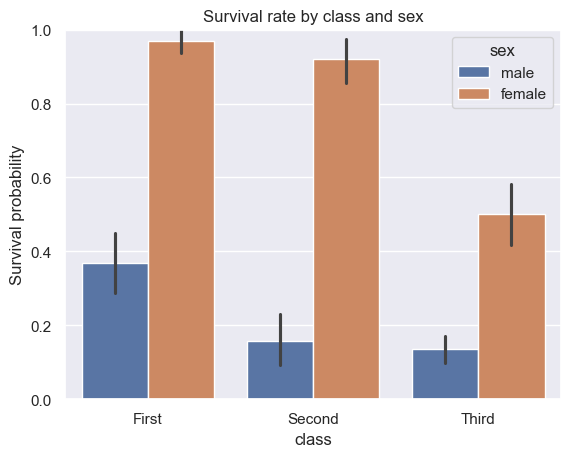

In [ ]:
# Visualize the distribution pattern between sex, class, and survived
sns.barplot(data=titanic, x="class", y="survived", hue="sex")
plt.title("Survival rate by class and sex")
plt.ylabel("Survival probability")
plt.ylim(0, 1)
plt.show()

- 1. Females consistently have higher survival rates across all classes.
- 2. Class strongly affects survival for both sexes (1st > 2nd > 3rd).
- 3. Because women were overrepresented in higher classes, the overall "female advantage" in survival is partly due to class.
- 4. Class amplifies the observed gender–survival association.


# 7. Practice — Categorical Data Challenge

**Your goal:** Apply *everything* learned so far about categorical data:
- Contingency tables and proportions
- Grouped summaries (`groupby`)
- Percentages and fair comparisons
- Chi-square test for independence
- Categorical–categorical effect sizes (Cramér’s V)
- Tell a brief data story based on your findings



### 7.1 Choose a dataset
Pick **one** to work with:
- `titanic` use `df = titanic.copy()`
- `tips`    use `df = tips.copy()`


In [ ]:
# Your code here



### 7.2 Contingency tables + row/column proportions
- Build **two** contingency tables using `pd.crosstab` for two pairs of categorical variables.
- For each, compute **row-wise** and **column-wise** proportions.


In [ ]:
# Your code here



### 7.3 Grouped summaries
- Compute a grouped summary over **two categorical keys**, aggregating **at least two numeric targets** or one target with multiple aggregations.
- If you chose `tips` for example, compute **tip rate** = `tip / total_bill` and compare across groups.


In [ ]:
# Your code here



### 7.4 Percentages plot
- Convert a crosstab into **percentages** (row-wise).  
- Produce a **stacked bar** chart to compare across groups.


In [ ]:
# Your code here



### 7.5 Chi-square test
- Test **independence** for one of your contingency tables.  
- State whether you would reject the null at α=0.05.


In [ ]:
# Your code here



### 7.6 Cramér’s V matrix
- Build a **Cramér’s V** matrix for **5–7 categorical columns** and visualize with a **heatmap**.
- Briefly comment on the **strongest** and **weakest** associations.


In [ ]:
# Your code here



### 7.7 Mini narrative (3–5 bullets)
Summarize your findings in clear, concise bullets. Mention at least one **limitation**.



**Your notes:**  
- ...  
- ...  
- ...


## Appendix — Quick Reference

**Contingency tables**
```
pd.crosstab(df['A'], df['B'])
pd.crosstab(df['A'], df['B'], normalize='index')    # row-wise
pd.crosstab(df['A'], df['B'], normalize='columns')  # column-wise
```

**Grouped summaries**
```
df.groupby(['g1','g2']).agg(mean_val=('x','mean'), n=('x','size'))
```

**Chi-square & Cramér’s V**
```
from scipy.stats import chi2_contingency
tbl = pd.crosstab(df['A'], df['B'])
chi2, p, dof, expected = chi2_contingency(tbl)

def cramers_v(x, y):
    tbl = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(tbl)
    n = tbl.values.sum()
    r, k = tbl.shape
    return np.sqrt(chi2 / (n * (min(r-1, k-1))))
```
